In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np   # 배열 사용할 때 numpy
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


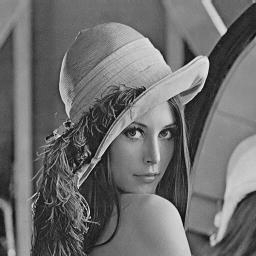

In [2]:
img = cv2.imread('/content/gdrive/My Drive/images/lena256.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

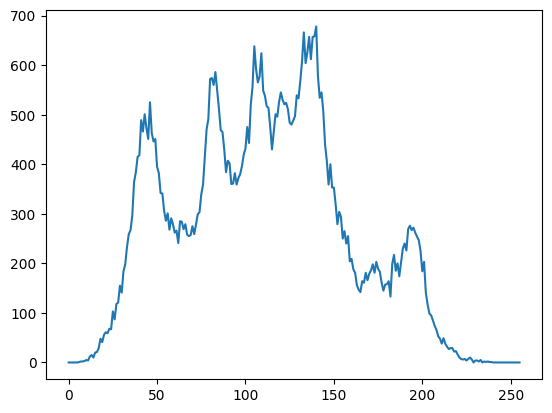

In [3]:
hist = cv2.calcHist([gimg1], [0], None, [256], [0,256])
plt.plot(hist)

(256, 256, 3)


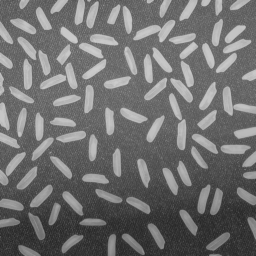

In [5]:
img = cv2.imread('/content/gdrive/My Drive/images/rice.bmp')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

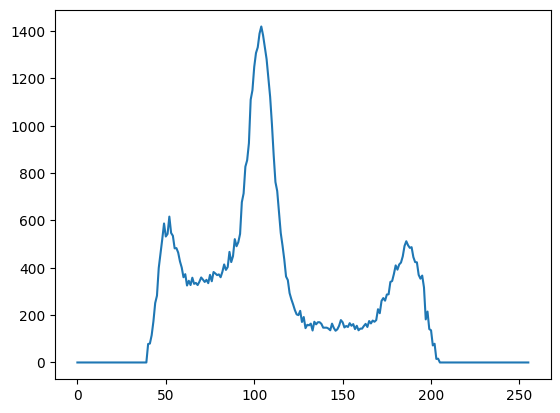

In [6]:
hist = cv2.calcHist([gimg1], [0], None, [256], [0,256])
plt.plot(hist)

(256, 256, 3)


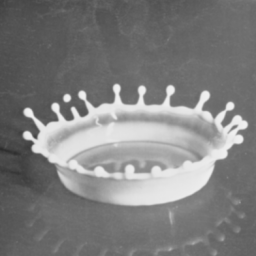

In [9]:
img = cv2.imread('/content/gdrive/My Drive/images/milkdrop.bmp')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

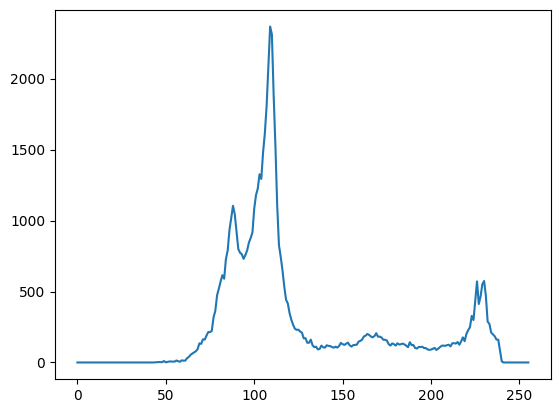

In [10]:
hist = cv2.calcHist([gimg1], [0], None, [256], [0,256])
plt.plot(hist)

(360, 360, 3)


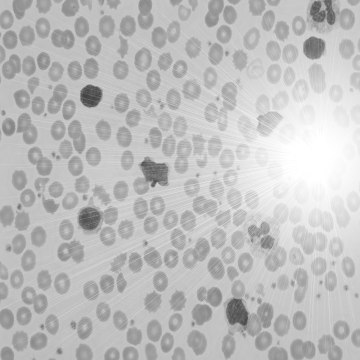

In [38]:
#img = cv2.imread('/content/gdrive/My Drive/images/cell.bmp')
img = cv2.imread('/content/gdrive/My Drive/images/cell-bright.bmp')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

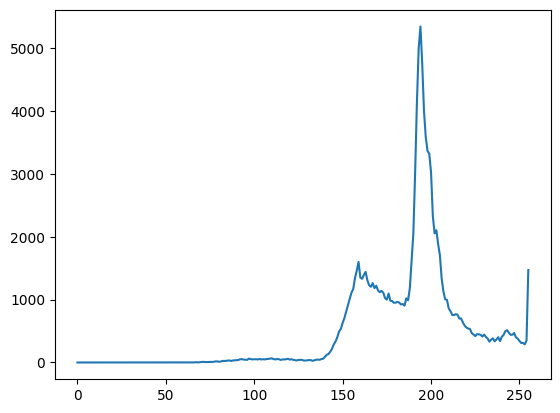

In [39]:
hist = cv2.calcHist([gimg1], [0], None, [256], [0,256])
plt.plot(hist)

In [40]:
gBin = np.zeros((gimg1.shape[0], gimg1.shape[1]), dtype=np.ubyte)

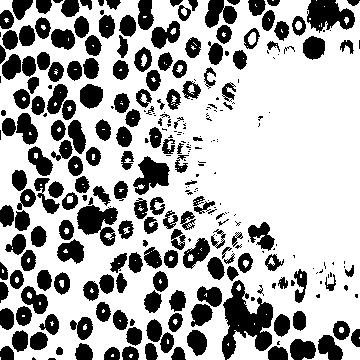

In [41]:
Threshold = 180
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if gimg1[h, w] > Threshold:
      gBin[h, w] = 255
    else:
      gBin[h, w] = 0

cv2_imshow(gBin)

In [48]:
T1 = 150
T2 = 0
T0 = 1

In [49]:
#수정 필요
def threshold_update(img, bimg):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(img.shape[0]):
    for w in range(gimg1.shape[1]):
      if bimg[h, w] == 255:
        sum1 += img[h, w]
        count1 += 1
      else:
        sum2 += img[h, w]
        count2 += 1

  T = int((sum1/count1 + sum2/count2)/2)
  return T


/tmp/ipython-input-3202716179.py:11: RuntimeWarning: overflow encountered in scalar add
  sum1 += img[h, w]


0


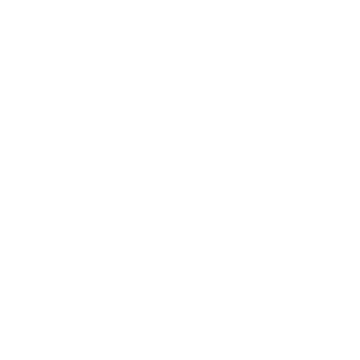

In [50]:
while True:
  T2 = threshold_update(gimg1, gBin)

  if(np.abs(T1-T2) < T0):
    break
  else:
    T1 = T2
    for h in range(gimg1.shape[0]):
      for w in range(gimg1.shape[1]):
        if gimg1[h, w] > T1:
          gBin[h, w] = 255
        else:
          gBin[h, w] = 0

print(T2)
cv2_imshow(gBin)